In [1]:
import numpy as np
import pandas as pd
import h5py
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import *
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.python.ops import nn
#from keras.callbacks import ModelCheckpoint, LearningRateScheduler
#from keras import backend as keras
"""
import torch
import pickle
import os
import skimage.io as io
import skimage.transform as trans

from functions import *
from torch.utils.data import TensorDataset

import os
import json
import torch
import pickle
from train_functions import *
from functions import *
import torch.optim as optim#hf = h5py.File('cavity_data_172_channel1_SDF.h5', 'r')

from torch.utils.data import TensorDataset
from Models.UNetEx import UNetEx
"""

ModuleNotFoundError: No module named 'h5py'

In [19]:
# loss function is tested using total_gen_loss= tf.constant(0.) and  tf.constant(1.)
#from tensorflow.keras import backend
def loss_function_generator(y_pred, y_true):

    total_gen_loss = tf.reduce_mean(tf.abs(y_true - y_pred))
    
    return total_gen_loss

In [60]:
LR = 0.001
filters = [8, 16, 32, 32]
f1=8
f2=16
f3=32
ks=(5, 5)
channel_out = 3
chIn=9
input_size = (50,50,chIn)
inputs = Input(input_size)

initializer = tf.random_normal_initializer(0., 0.02)
kernel_initializer_N=initializer
#kernel_initializer_N='he_normal'
#kernel_initializer_N='glorot_uniform'
#initializer = random_normal_initializer(0., 0.02)
#kernel_initializer_N='he_normal'
#activation_N='tanh'
#activation_N='relu'
#activation_N='selu'
#activation_N='elu'
#activation_N='sigmoid'
#activation_N='softplus'
activation_N=tf.nn.swish

model = keras.Sequential()
conv1 = keras.layers.Conv2D(filters = f1, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(inputs)
conv1 = keras.layers.Conv2D(filters = f1, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(conv1)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = keras.layers.Conv2D(filters = f2, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(pool1)
conv2 = keras.layers.Conv2D(filters = f2, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(conv2)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)


conv3 = keras.layers.Conv2D(filters = f3, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(pool2)
conv4 = keras.layers.Conv2D(filters = f3, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(conv3)
#pool3 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)

#conv4 = keras.layers.Conv2D(filters = f4, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(pool3)
#conv5 = keras.layers.Conv2D(filters = f4, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(conv4)
#drop4 = keras.layers.Dropout(0.5)(conv4)
#pool4 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv4)


#conv5 = keras.layers.Conv2D(1024, 3, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(pool4)
#conv5 = keras.layers.Conv2D(1024, 3, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(conv5)
#drop5 = keras.layers.Dropout(0.5)(conv5)


#up6 = keras.layers.Conv2D(256, 3, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(UpSampling2D(size = (2,2))(drop4))

up6 = keras.layers.Conv2D(filters = f3, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(conv4)
merge6 = keras.layers.concatenate([conv3,up6],axis=3)
conv6 = keras.layers.Conv2D(filters = f3, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(merge6)
conv6 = keras.layers.Conv2D(filters = f3, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(conv6)

#merged_tensors = keras.layers.concatenate([ZeroPadding2D(((3,0),(4,0)))(x1),x2],axis=3)

up7 = keras.layers.Conv2D(filters = f2, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(UpSampling2D(size = (2,2))(conv6))
#merge7 = keras.layers.concatenate([conv2,up7],axis=3)
merge7 = keras.layers.concatenate([ZeroPadding2D(((0,1),(1,0)))(up7),conv2],axis=3)

conv7 = keras.layers.Conv2D(filters = f2, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(merge7)
conv7 = keras.layers.Conv2D(filters = f2, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(conv7)


up8 = keras.layers.Conv2D(filters = f1, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(UpSampling2D(size = (2,2))(conv7))
merge8 = keras.layers.concatenate([conv1,up8],axis=3)
#merge8 = keras.layers.concatenate([ZeroPadding2D(((0,0),(1,0)))(up8),conv2],axis=3)

conv8 = keras.layers.Conv2D(filters = f1, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(merge8)
#conv8 = keras.layers.Conv2D(filters = f1, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(conv8)


#up9 = keras.layers.Conv2D(filters = f1, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(UpSampling2D(size = (2,2))(conv8))
#merge9 = keras.layers.concatenate([conv1,up9],axis=3)
#merge9 = keras.layers.concatenate([ZeroPadding2D(((0,0),(1,0)))(up9),conv1],axis=3)
#conv9 = keras.layers.Conv2D(filters = f1, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(merge9)
#conv9 = keras.layers.Conv2D(64, kernel_size= ks, 0.7666162252426147activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(conv9)
#conv9 = keras.layers.Conv2D(2, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(conv9)
#conv10 = keras.layers.Conv2D(3, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(conv9)
conv10 = keras.layers.Conv2D(channel_out, kernel_size= ks, padding = 'same', kernel_initializer = kernel_initializer_N)(conv8)

# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

model = Model(inputs = inputs, outputs = conv10)
#model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])


model.compile(optimizer = Adam(lr = LR), loss = loss_function_generator, metrics = ['accuracy'])

#model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=LR), loss = tf.keras.losses.MeanSquaredError(), metrics = ['accuracy'])

#model.compile(optimizer = Adam(lr = LR), loss = tf.keras.losses.MeanSquaredError(), metrics = ['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50, 50, 9)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 50, 50, 8)    1808        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 50, 50, 8)    1608        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 25, 25, 8)    0           conv2d_1[0][0]                   
______________________________________________________________________________________________

/home/ailab/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [37]:
hf = h5py.File('cavity_data_900_shuffle_channel_12.h5', 'r')
hf.keys()
geometry_xy = hf.get('geometry_xy')
data_xy = hf.get('data_xy')

In [38]:
data_xy.shape

(900, 50, 50, 5)

In [44]:
data_xy.drop(2)

AttributeError: 'Dataset' object has no attribute 'drop'

In [39]:
geometry_xy.shape

(900, 50, 50, 12)

In [40]:
#data_xy=np.empty((916,64,64,5), float)
#geometry_xy=np.empty((916,64,64,chIn), float)

#data_xy[:,:,:,:]=data_xy1[:,:,:,:]
#geometry_xy[:,:,:,:]=geometry_xy1[:,:,:,:]


In [ ]:
"""

Input
1 = x
2 = y
3 = beta
4 = BC-u
5 = BC-v
0-4

6 = BC-p
 
 6-7

7 = SDF-u
8 = SDF-v

9 = SDF-p
10 = BC-T
11 = SDF-T
12 = g



Out-put
channel 1 = u
channel 2 = v
channel 3 = p
channel 4 = T
channel 5 = p_rgh

"""


In [41]:
#train_data_xy_N=np.empty((630,50,50,5), float)
#train_geometry_xy_N=np.empty((630,50,50,12), float)
#train_data_xy_N[0:630,:,:,:]=data_xy[0:630,:,:,0:channel_out]
#train_geometry_xy_N[0:630,:,:,:]=geometry_xy[0:630,:,:,:]

In [52]:
train_data_xy=np.empty((630,50,50,channel_out), float)
train_geometry_xy=np.empty((630,50,50,chIn), float)
train_data_xy[0:630,:,:,0:1]=data_xy[0:630,:,:,0:1]
train_data_xy[0:630,:,:,1:2]=data_xy[0:630,:,:,2:3]
train_geometry_xy[0:630,:,:,0:4]=geometry_xy[0:630,:,:,0:4]
train_geometry_xy[0:630,:,:,4:6]=geometry_xy[0:630,:,:,5:7]
train_geometry_xy[0:630,:,:,6:8]=geometry_xy[0:630,:,:,8:10]

In [53]:
test_data_xy=np.empty((180,50,50,channel_out), float)
test_geometry_xy=np.empty((180,50,50,chIn), float)


test_data_xy[0:180,:,:,0:1]=data_xy[630:810,:,:,0:1]
test_data_xy[0:180,:,:,1:2]=data_xy[630:810,:,:,2:3]

test_geometry_xy[0:180,:,:,0:4]=geometry_xy[630:810,:,:,0:4]
test_geometry_xy[0:180,:,:,4:6]=geometry_xy[630:810,:,:,5:7]
test_geometry_xy[0:180,:,:,6:8]=geometry_xy[630:810,:,:,8:10]

In [54]:
test_data_xy.shape

(180, 50, 50, 3)

In [57]:
pre_data_xy=np.empty((90,50,50,channel_out), float)
pre_geometry_xy=np.empty((90,50,50,chIn), float)

pre_data_xy[0:90,:,:,0:1]=data_xy[810:900,:,:,0:1]
pre_data_xy[0:90,:,:,1:2]=data_xy[810:900,:,:,2:3]

pre_geometry_xy[0:90,:,:,0:4]=geometry_xy[810:900,:,:,0:4]
pre_geometry_xy[0:90,:,:,4:6]=geometry_xy[810:900,:,:,5:7]
pre_geometry_xy[0:90,:,:,6:8]=geometry_xy[810:900,:,:,8:10]


In [32]:
#model = load_model('./checkpoint-layer-3-8-16-32-batch-32-elu_0.9136608242988586', custom_objects={'loss_function_generator': loss_function_generator})

In [33]:
"""
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=25)

history = model.fit(
                    train_geometry_xy, train_data_xy, 
                    epochs=400, batch_size=32, callbacks=[early_stopping],
                    validation_data=(test_geometry_xy, test_data_xy)
                    )
                    """

"\nfrom tensorflow.keras.callbacks import EarlyStopping\nearly_stopping = EarlyStopping(monitor='val_loss', patience=25)\n\nhistory = model.fit(\n                    train_geometry_xy, train_data_xy, \n                    epochs=400, batch_size=32, callbacks=[early_stopping],\n                    validation_data=(test_geometry_xy, test_data_xy)\n                    )\n                    "

In [58]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="checkpoint-layer-3-8-16-32-batch-32-swish_{val_accuracy}",
    #save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [61]:
#model.fit(data_xy, geometry_xy, epochs=5, batch_size=64)
#model.fit(geometry_xy, data_xy, epochs=500)
history = model.fit(
                    train_geometry_xy, train_data_xy, 
                    epochs=1000, batch_size=32, callbacks=[model_checkpoint_callback],
                    validation_data=(test_geometry_xy, test_data_xy)
                    )

Epoch 1/1000
20/20 [==============================] - 11s 478ms/step - loss: 1.5186 - accuracy: 0.4841 - val_loss: 1.2823 - val_accuracy: 0.7986
INFO:tensorflow:Assets written to: checkpoint-layer-3-8-16-32-batch-32-swish_0.7985733151435852/assets
Epoch 2/1000
20/20 [==============================] - 9s 462ms/step - loss: 1.0260 - accuracy: 0.4829 - val_loss: 1.0347 - val_accuracy: 0.4580
Epoch 3/1000
20/20 [==============================] - 8s 419ms/step - loss: 0.5021 - accuracy: 0.5023 - val_loss: 0.5113 - val_accuracy: 0.3868
Epoch 4/1000
20/20 [==============================] - 6s 295ms/step - loss: 0.2920 - accuracy: 0.5584 - val_loss: 0.4660 - val_accuracy: 0.2133
Epoch 5/1000
20/20 [==============================] - 6s 304ms/step - loss: 0.2426 - accuracy: 0.5333 - val_loss: 0.4401 - val_accuracy: 0.1559
Epoch 6/1000
20/20 [==============================] - 6s 300ms/step - loss: 0.2205 - accuracy: 0.5240 - val_loss: 0.4270 - val_accuracy: 0.1764
Epoch 7/1000
20/20 [============

20/20 [==============================] - 6s 295ms/step - loss: 0.0509 - accuracy: 0.5140 - val_loss: 0.2630 - val_accuracy: 0.3207
Epoch 56/1000
20/20 [==============================] - 6s 296ms/step - loss: 0.0493 - accuracy: 0.5171 - val_loss: 0.2645 - val_accuracy: 0.2354
Epoch 57/1000
20/20 [==============================] - 6s 295ms/step - loss: 0.0479 - accuracy: 0.5140 - val_loss: 0.2593 - val_accuracy: 0.2962
Epoch 58/1000
20/20 [==============================] - 6s 296ms/step - loss: 0.0482 - accuracy: 0.5188 - val_loss: 0.2577 - val_accuracy: 0.1844
Epoch 59/1000
20/20 [==============================] - 6s 297ms/step - loss: 0.0546 - accuracy: 0.5194 - val_loss: 0.2734 - val_accuracy: 0.2100
Epoch 60/1000
20/20 [==============================] - 6s 296ms/step - loss: 0.0606 - accuracy: 0.5202 - val_loss: 0.2652 - val_accuracy: 0.7025
Epoch 61/1000
20/20 [==============================] - 6s 293ms/step - loss: 0.0541 - accuracy: 0.5400 - val_loss: 0.2569 - val_accuracy: 0.6023

20/20 [==============================] - 6s 298ms/step - loss: 0.0265 - accuracy: 0.5197 - val_loss: 0.2356 - val_accuracy: 0.4553
Epoch 112/1000
20/20 [==============================] - 6s 297ms/step - loss: 0.0218 - accuracy: 0.5228 - val_loss: 0.2391 - val_accuracy: 0.5291
Epoch 113/1000
20/20 [==============================] - 6s 295ms/step - loss: 0.0306 - accuracy: 0.5170 - val_loss: 0.2418 - val_accuracy: 0.4806
Epoch 114/1000
20/20 [==============================] - 6s 305ms/step - loss: 0.0243 - accuracy: 0.5270 - val_loss: 0.2358 - val_accuracy: 0.3727
Epoch 115/1000
20/20 [==============================] - 6s 296ms/step - loss: 0.0214 - accuracy: 0.5286 - val_loss: 0.2362 - val_accuracy: 0.5921
Epoch 116/1000
20/20 [==============================] - 6s 295ms/step - loss: 0.0294 - accuracy: 0.5273 - val_loss: 0.2441 - val_accuracy: 0.4069
Epoch 117/1000
20/20 [==============================] - 6s 295ms/step - loss: 0.0301 - accuracy: 0.5181 - val_loss: 0.2391 - val_accuracy: 

20/20 [==============================] - 6s 294ms/step - loss: 0.0165 - accuracy: 0.5302 - val_loss: 0.2361 - val_accuracy: 0.8225
Epoch 168/1000
20/20 [==============================] - 6s 294ms/step - loss: 0.0236 - accuracy: 0.5245 - val_loss: 0.2381 - val_accuracy: 0.8571
Epoch 169/1000
20/20 [==============================] - 6s 297ms/step - loss: 0.0221 - accuracy: 0.5267 - val_loss: 0.2371 - val_accuracy: 0.7925
Epoch 170/1000
20/20 [==============================] - 6s 297ms/step - loss: 0.0227 - accuracy: 0.5304 - val_loss: 0.2352 - val_accuracy: 0.8294
Epoch 171/1000
20/20 [==============================] - 6s 297ms/step - loss: 0.0222 - accuracy: 0.5274 - val_loss: 0.2383 - val_accuracy: 0.8187
Epoch 172/1000
20/20 [==============================] - 6s 294ms/step - loss: 0.0229 - accuracy: 0.5254 - val_loss: 0.2365 - val_accuracy: 0.7957
Epoch 173/1000
20/20 [==============================] - 6s 295ms/step - loss: 0.0226 - accuracy: 0.5241 - val_loss: 0.2366 - val_accuracy: 

20/20 [==============================] - 6s 294ms/step - loss: 0.0197 - accuracy: 0.5287 - val_loss: 0.2272 - val_accuracy: 0.7978
Epoch 224/1000
20/20 [==============================] - 6s 295ms/step - loss: 0.0185 - accuracy: 0.5327 - val_loss: 0.2262 - val_accuracy: 0.7667
Epoch 225/1000
20/20 [==============================] - 6s 296ms/step - loss: 0.0140 - accuracy: 0.5326 - val_loss: 0.2260 - val_accuracy: 0.8311
Epoch 226/1000
20/20 [==============================] - 6s 295ms/step - loss: 0.0166 - accuracy: 0.5366 - val_loss: 0.2305 - val_accuracy: 0.7774
Epoch 227/1000
20/20 [==============================] - 6s 295ms/step - loss: 0.0196 - accuracy: 0.5380 - val_loss: 0.2287 - val_accuracy: 0.8001
Epoch 228/1000
20/20 [==============================] - 6s 294ms/step - loss: 0.0189 - accuracy: 0.5360 - val_loss: 0.2249 - val_accuracy: 0.7749
Epoch 229/1000
20/20 [==============================] - 6s 294ms/step - loss: 0.0129 - accuracy: 0.5324 - val_loss: 0.2230 - val_accuracy: 

20/20 [==============================] - 6s 293ms/step - loss: 0.0173 - accuracy: 0.5310 - val_loss: 0.2309 - val_accuracy: 0.7556
Epoch 280/1000
20/20 [==============================] - 6s 294ms/step - loss: 0.0170 - accuracy: 0.5327 - val_loss: 0.2280 - val_accuracy: 0.7516
Epoch 281/1000
20/20 [==============================] - 6s 295ms/step - loss: 0.0174 - accuracy: 0.5311 - val_loss: 0.2295 - val_accuracy: 0.7624
Epoch 282/1000
20/20 [==============================] - 6s 291ms/step - loss: 0.0167 - accuracy: 0.5325 - val_loss: 0.2270 - val_accuracy: 0.7739
Epoch 283/1000
20/20 [==============================] - 6s 294ms/step - loss: 0.0169 - accuracy: 0.5336 - val_loss: 0.2289 - val_accuracy: 0.8109
Epoch 284/1000
20/20 [==============================] - 6s 293ms/step - loss: 0.0167 - accuracy: 0.5366 - val_loss: 0.2306 - val_accuracy: 0.7682
Epoch 285/1000
20/20 [==============================] - 6s 294ms/step - loss: 0.0164 - accuracy: 0.5353 - val_loss: 0.2261 - val_accuracy: 

20/20 [==============================] - 6s 296ms/step - loss: 0.0155 - accuracy: 0.5380 - val_loss: 0.2263 - val_accuracy: 0.6933
Epoch 336/1000
20/20 [==============================] - 6s 295ms/step - loss: 0.0136 - accuracy: 0.5304 - val_loss: 0.2252 - val_accuracy: 0.7850
Epoch 337/1000
20/20 [==============================] - 6s 296ms/step - loss: 0.0127 - accuracy: 0.5345 - val_loss: 0.2228 - val_accuracy: 0.7803
Epoch 338/1000
20/20 [==============================] - 6s 294ms/step - loss: 0.0127 - accuracy: 0.5359 - val_loss: 0.2244 - val_accuracy: 0.8110
Epoch 339/1000
20/20 [==============================] - 6s 294ms/step - loss: 0.0136 - accuracy: 0.5399 - val_loss: 0.2237 - val_accuracy: 0.8168
Epoch 340/1000
20/20 [==============================] - 6s 295ms/step - loss: 0.0158 - accuracy: 0.5408 - val_loss: 0.2233 - val_accuracy: 0.7326
Epoch 341/1000
20/20 [==============================] - 6s 295ms/step - loss: 0.0154 - accuracy: 0.5350 - val_loss: 0.2237 - val_accuracy: 

20/20 [==============================] - 6s 296ms/step - loss: 0.0131 - accuracy: 0.5341 - val_loss: 0.2217 - val_accuracy: 0.8098
Epoch 392/1000
20/20 [==============================] - 6s 296ms/step - loss: 0.0134 - accuracy: 0.5326 - val_loss: 0.2246 - val_accuracy: 0.7489
Epoch 393/1000
20/20 [==============================] - 6s 297ms/step - loss: 0.0119 - accuracy: 0.5379 - val_loss: 0.2210 - val_accuracy: 0.7077
Epoch 394/1000
20/20 [==============================] - 6s 295ms/step - loss: 0.0097 - accuracy: 0.5285 - val_loss: 0.2232 - val_accuracy: 0.7349
Epoch 395/1000
20/20 [==============================] - 6s 294ms/step - loss: 0.0117 - accuracy: 0.5334 - val_loss: 0.2246 - val_accuracy: 0.7679
Epoch 396/1000
20/20 [==============================] - 6s 294ms/step - loss: 0.0130 - accuracy: 0.5349 - val_loss: 0.2215 - val_accuracy: 0.7503
Epoch 397/1000
20/20 [==============================] - 6s 297ms/step - loss: 0.0108 - accuracy: 0.5323 - val_loss: 0.2240 - val_accuracy: 

20/20 [==============================] - 6s 292ms/step - loss: 0.0097 - accuracy: 0.5391 - val_loss: 0.2205 - val_accuracy: 0.7922
Epoch 448/1000
20/20 [==============================] - 6s 294ms/step - loss: 0.0111 - accuracy: 0.5376 - val_loss: 0.2234 - val_accuracy: 0.7749
Epoch 449/1000
20/20 [==============================] - 6s 295ms/step - loss: 0.0120 - accuracy: 0.5403 - val_loss: 0.2207 - val_accuracy: 0.7237
Epoch 450/1000
20/20 [==============================] - 6s 294ms/step - loss: 0.0129 - accuracy: 0.5292 - val_loss: 0.2264 - val_accuracy: 0.7421
Epoch 451/1000
20/20 [==============================] - 6s 292ms/step - loss: 0.0139 - accuracy: 0.5301 - val_loss: 0.2263 - val_accuracy: 0.7528
Epoch 452/1000
20/20 [==============================] - 6s 294ms/step - loss: 0.0141 - accuracy: 0.5272 - val_loss: 0.2253 - val_accuracy: 0.7276
Epoch 453/1000
20/20 [==============================] - 6s 295ms/step - loss: 0.0135 - accuracy: 0.5241 - val_loss: 0.2220 - val_accuracy: 

20/20 [==============================] - 6s 301ms/step - loss: 0.0128 - accuracy: 0.5357 - val_loss: 0.2242 - val_accuracy: 0.6850
Epoch 504/1000
20/20 [==============================] - 6s 296ms/step - loss: 0.0128 - accuracy: 0.5333 - val_loss: 0.2216 - val_accuracy: 0.6997
Epoch 505/1000
20/20 [==============================] - 6s 296ms/step - loss: 0.0123 - accuracy: 0.5301 - val_loss: 0.2278 - val_accuracy: 0.7548
Epoch 506/1000
20/20 [==============================] - 6s 300ms/step - loss: 0.0126 - accuracy: 0.5432 - val_loss: 0.2222 - val_accuracy: 0.7507
Epoch 507/1000
20/20 [==============================] - 6s 294ms/step - loss: 0.0097 - accuracy: 0.5278 - val_loss: 0.2197 - val_accuracy: 0.7809
Epoch 508/1000
20/20 [==============================] - 6s 293ms/step - loss: 0.0098 - accuracy: 0.5392 - val_loss: 0.2222 - val_accuracy: 0.7245
Epoch 509/1000
20/20 [==============================] - 6s 293ms/step - loss: 0.0120 - accuracy: 0.5370 - val_loss: 0.2210 - val_accuracy: 

20/20 [==============================] - 6s 293ms/step - loss: 0.0119 - accuracy: 0.5333 - val_loss: 0.2238 - val_accuracy: 0.7273
Epoch 560/1000
20/20 [==============================] - 6s 294ms/step - loss: 0.0113 - accuracy: 0.5367 - val_loss: 0.2209 - val_accuracy: 0.7239
Epoch 561/1000
20/20 [==============================] - 6s 295ms/step - loss: 0.0098 - accuracy: 0.5331 - val_loss: 0.2208 - val_accuracy: 0.8085
Epoch 562/1000
20/20 [==============================] - 6s 296ms/step - loss: 0.0094 - accuracy: 0.5364 - val_loss: 0.2210 - val_accuracy: 0.7888
Epoch 563/1000
20/20 [==============================] - 6s 294ms/step - loss: 0.0095 - accuracy: 0.5228 - val_loss: 0.2270 - val_accuracy: 0.7062
Epoch 564/1000
20/20 [==============================] - 6s 293ms/step - loss: 0.0122 - accuracy: 0.5286 - val_loss: 0.2276 - val_accuracy: 0.7499
Epoch 565/1000
20/20 [==============================] - 6s 293ms/step - loss: 0.0126 - accuracy: 0.5402 - val_loss: 0.2240 - val_accuracy: 

20/20 [==============================] - 6s 294ms/step - loss: 0.0087 - accuracy: 0.5326 - val_loss: 0.2202 - val_accuracy: 0.7745
Epoch 616/1000
20/20 [==============================] - 6s 293ms/step - loss: 0.0087 - accuracy: 0.5346 - val_loss: 0.2189 - val_accuracy: 0.7258
Epoch 617/1000
20/20 [==============================] - 6s 296ms/step - loss: 0.0089 - accuracy: 0.5350 - val_loss: 0.2211 - val_accuracy: 0.7237
Epoch 618/1000
20/20 [==============================] - 6s 294ms/step - loss: 0.0117 - accuracy: 0.5410 - val_loss: 0.2203 - val_accuracy: 0.7239
Epoch 619/1000
20/20 [==============================] - 6s 294ms/step - loss: 0.0097 - accuracy: 0.5299 - val_loss: 0.2223 - val_accuracy: 0.7784
Epoch 620/1000
20/20 [==============================] - 6s 295ms/step - loss: 0.0095 - accuracy: 0.5354 - val_loss: 0.2214 - val_accuracy: 0.7852
Epoch 621/1000
20/20 [==============================] - 6s 294ms/step - loss: 0.0088 - accuracy: 0.5303 - val_loss: 0.2197 - val_accuracy: 

20/20 [==============================] - 6s 294ms/step - loss: 0.0086 - accuracy: 0.5341 - val_loss: 0.2198 - val_accuracy: 0.8592
Epoch 672/1000
20/20 [==============================] - 6s 292ms/step - loss: 0.0096 - accuracy: 0.5292 - val_loss: 0.2205 - val_accuracy: 0.5697
Epoch 673/1000
20/20 [==============================] - 6s 296ms/step - loss: 0.0100 - accuracy: 0.5184 - val_loss: 0.2199 - val_accuracy: 0.3635
Epoch 674/1000
20/20 [==============================] - 6s 293ms/step - loss: 0.0084 - accuracy: 0.5240 - val_loss: 0.2191 - val_accuracy: 0.6049
Epoch 675/1000
20/20 [==============================] - 6s 295ms/step - loss: 0.0085 - accuracy: 0.5306 - val_loss: 0.2197 - val_accuracy: 0.5608
Epoch 676/1000
20/20 [==============================] - 6s 294ms/step - loss: 0.0082 - accuracy: 0.5168 - val_loss: 0.2189 - val_accuracy: 0.8337
Epoch 677/1000
20/20 [==============================] - 6s 296ms/step - loss: 0.0088 - accuracy: 0.5328 - val_loss: 0.2213 - val_accuracy: 

20/20 [==============================] - 6s 312ms/step - loss: 0.0076 - accuracy: 0.5523 - val_loss: 0.2182 - val_accuracy: 0.4583
Epoch 728/1000
20/20 [==============================] - 6s 305ms/step - loss: 0.0104 - accuracy: 0.5526 - val_loss: 0.2219 - val_accuracy: 0.4531
Epoch 729/1000
20/20 [==============================] - 6s 303ms/step - loss: 0.0099 - accuracy: 0.5544 - val_loss: 0.2199 - val_accuracy: 0.3818
Epoch 730/1000
20/20 [==============================] - 6s 302ms/step - loss: 0.0082 - accuracy: 0.5573 - val_loss: 0.2195 - val_accuracy: 0.2825
Epoch 731/1000
20/20 [==============================] - 6s 301ms/step - loss: 0.0089 - accuracy: 0.5530 - val_loss: 0.2202 - val_accuracy: 0.4584
Epoch 732/1000
20/20 [==============================] - 6s 313ms/step - loss: 0.0089 - accuracy: 0.5441 - val_loss: 0.2198 - val_accuracy: 0.5178
Epoch 733/1000
20/20 [==============================] - 6s 324ms/step - loss: 0.0109 - accuracy: 0.5572 - val_loss: 0.2225 - val_accuracy: 

20/20 [==============================] - 6s 301ms/step - loss: 0.0089 - accuracy: 0.5522 - val_loss: 0.2183 - val_accuracy: 0.4420
Epoch 784/1000
20/20 [==============================] - 6s 304ms/step - loss: 0.0092 - accuracy: 0.5411 - val_loss: 0.2235 - val_accuracy: 0.2762
Epoch 785/1000
20/20 [==============================] - 6s 297ms/step - loss: 0.0094 - accuracy: 0.5575 - val_loss: 0.2212 - val_accuracy: 0.3822
Epoch 786/1000
20/20 [==============================] - 6s 292ms/step - loss: 0.0088 - accuracy: 0.5538 - val_loss: 0.2206 - val_accuracy: 0.5139
Epoch 787/1000
20/20 [==============================] - 6s 300ms/step - loss: 0.0099 - accuracy: 0.5502 - val_loss: 0.2208 - val_accuracy: 0.3618
Epoch 788/1000
20/20 [==============================] - 6s 300ms/step - loss: 0.0086 - accuracy: 0.5674 - val_loss: 0.2201 - val_accuracy: 0.4831
Epoch 789/1000
20/20 [==============================] - 6s 306ms/step - loss: 0.0088 - accuracy: 0.5683 - val_loss: 0.2201 - val_accuracy: 

20/20 [==============================] - 6s 305ms/step - loss: 0.0087 - accuracy: 0.5474 - val_loss: 0.2191 - val_accuracy: 0.4807
Epoch 840/1000
20/20 [==============================] - 6s 293ms/step - loss: 0.0082 - accuracy: 0.5476 - val_loss: 0.2184 - val_accuracy: 0.6208
Epoch 841/1000
20/20 [==============================] - 6s 294ms/step - loss: 0.0073 - accuracy: 0.5481 - val_loss: 0.2193 - val_accuracy: 0.2260
Epoch 842/1000
20/20 [==============================] - 6s 302ms/step - loss: 0.0085 - accuracy: 0.5536 - val_loss: 0.2196 - val_accuracy: 0.4544
Epoch 843/1000
20/20 [==============================] - 6s 296ms/step - loss: 0.0083 - accuracy: 0.5568 - val_loss: 0.2194 - val_accuracy: 0.5326
Epoch 844/1000
20/20 [==============================] - 6s 305ms/step - loss: 0.0083 - accuracy: 0.5446 - val_loss: 0.2186 - val_accuracy: 0.5077
Epoch 845/1000
20/20 [==============================] - 6s 304ms/step - loss: 0.0071 - accuracy: 0.5518 - val_loss: 0.2196 - val_accuracy: 

20/20 [==============================] - 6s 314ms/step - loss: 0.0078 - accuracy: 0.5178 - val_loss: 0.2186 - val_accuracy: 0.2428
Epoch 896/1000
20/20 [==============================] - 6s 322ms/step - loss: 0.0079 - accuracy: 0.5372 - val_loss: 0.2184 - val_accuracy: 0.4898
Epoch 897/1000
20/20 [==============================] - 6s 314ms/step - loss: 0.0069 - accuracy: 0.5400 - val_loss: 0.2181 - val_accuracy: 0.6857
Epoch 898/1000
20/20 [==============================] - 6s 324ms/step - loss: 0.0096 - accuracy: 0.5489 - val_loss: 0.2234 - val_accuracy: 0.5598
Epoch 899/1000
20/20 [==============================] - 6s 305ms/step - loss: 0.0091 - accuracy: 0.5529 - val_loss: 0.2199 - val_accuracy: 0.4915
Epoch 900/1000
20/20 [==============================] - 6s 307ms/step - loss: 0.0093 - accuracy: 0.5663 - val_loss: 0.2201 - val_accuracy: 0.4460
Epoch 901/1000
20/20 [==============================] - 6s 312ms/step - loss: 0.0071 - accuracy: 0.5458 - val_loss: 0.2180 - val_accuracy: 

20/20 [==============================] - 6s 297ms/step - loss: 0.0076 - accuracy: 0.5128 - val_loss: 0.2182 - val_accuracy: 0.5442
Epoch 952/1000
20/20 [==============================] - 6s 294ms/step - loss: 0.0074 - accuracy: 0.5225 - val_loss: 0.2177 - val_accuracy: 0.1709
Epoch 953/1000
20/20 [==============================] - 6s 295ms/step - loss: 0.0083 - accuracy: 0.5195 - val_loss: 0.2210 - val_accuracy: 0.7396
Epoch 954/1000
20/20 [==============================] - 6s 293ms/step - loss: 0.0089 - accuracy: 0.5147 - val_loss: 0.2195 - val_accuracy: 0.3827
Epoch 955/1000
20/20 [==============================] - 6s 295ms/step - loss: 0.0087 - accuracy: 0.5207 - val_loss: 0.2190 - val_accuracy: 0.1892
Epoch 956/1000
20/20 [==============================] - 6s 295ms/step - loss: 0.0104 - accuracy: 0.5128 - val_loss: 0.2204 - val_accuracy: 0.8418
Epoch 957/1000
20/20 [==============================] - 6s 295ms/step - loss: 0.0076 - accuracy: 0.5119 - val_loss: 0.2194 - val_accuracy: 

In [62]:
model.save('porousConv2D-V001-channel-9-uvT-900-layer-3-8-16-32-batch-32-swish.h5')

In [63]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
print('Training loss = ',min(loss), "Validation loss = ", min(val_loss))
print('Training accuracy = ',max(acc), "Validation accuracy = ", max(val_acc))

Training loss =  0.006169057451188564 Validation loss =  0.21706275641918182
Training accuracy =  0.5751562118530273 Validation accuracy =  0.9307711124420166


In [64]:
#Training loss =  0.5445457696914673 Validation loss =  0.5349123477935791
#Training accuracy =  0.8572048544883728 Validation accuracy =  0.8608496189117432

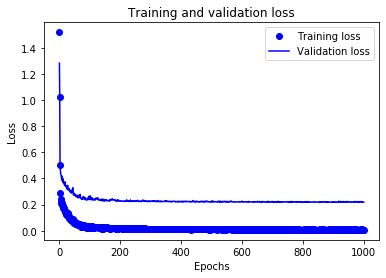

<Figure size 432x288 with 0 Axes>

In [65]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()

In [66]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

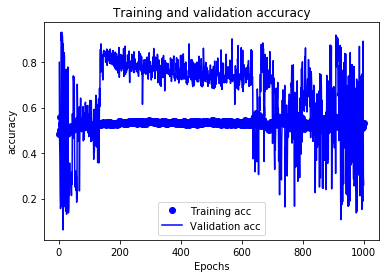

"\nacc = history.history['accuracy']\nval_acc = history.history['val_accuracy']\nplt.plot(epochs, acc, 'bo', label='Training acc')\nplt.plot(epochs, val_acc, 'b', label='Validation acc')\nplt.title('Training and validation accuracy')\nplt.xlabel('Epochs')\nplt.ylabel('accuracy')\nplt.legend()\nplt.show()\n"

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
"""
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
"""


In [68]:
#hf = h5py.File('rectCavity_3_all_channel_data.h5', 'r')
#hf.keys()
#geometry_xy1 = hf.get('geometry_xy')
#data_xy1 = hf.get('data_xy')

# 0 : SDF
# 1 : BC
# 2 : cell_x
# 3 : cell_y
# 4 : Re
# 5 : mu

In [69]:
#geometry_xy1[2,:,:,5]

In [70]:
#pre_geometry_xy_N=np.empty((3,64,64,chIn), float)
#pre_data_xy_N=np.empty((3,64,64,3), float)
#pre_data_xy_N[:,:,:,:]=data_xy1[:,:,:,:]
#pre_geometry_xy_N[:,:,:,0:1]=geometry_xy1[:,:,:,0:1]
#pre_geometry_xy_N[:,:,:,1:2]=geometry_xy1[:,:,:,:1:2]
#pre_geometry_xy_N[:,:,:,2:3]=geometry_xy1[:,:,:,:5:6]

In [71]:
val_preds = model.predict(pre_geometry_xy, verbose=1)

3/3 [==============================] - 0s 40ms/step


In [72]:
val_preds.shape

(90, 50, 50, 3)

In [73]:
def visualize_scale(sample_y, out_y,error, s):  
           
    minu = np.min(sample_y[s, :, :, 0])
    maxu = np.max(sample_y[s, :, :, 0])
    
    minv = np.min(sample_y[s, :, :, 1])
    maxv = np.max(sample_y[s, :, :, 1])
    
    #minp = np.min(sample_y[s, :, :, 2])
    #maxp = np.max(sample_y[s, :, :, 2])
    
    minT = np.min(sample_y[s, :, :, 2])
    maxT = np.max(sample_y[s, :, :, 2])
    
    #minp_rgh = np.min(sample_y[s, :, :, 4])
    #maxp_rgh = np.max(sample_y[s, :, :, 4])
    
    mineu = np.min(error[s, 0, :, :])
    maxeu = np.max(error[s, 0, :, :])
   
    minev = np.min(error[s, 1, :, :])
    maxev = np.max(error[s, 1, :, :])
    
  #  minep = np.min(error[s, 2, :, :])
   # maxep = np.max(error[s, 2, :, :])
    
    mineT = np.min(error[s, 2, :, :])
    maxeT = np.max(error[s, 2, :, :])
    
   # minep_rgh = np.min(error[s, 4, :, :])
  #  maxep_rgh = np.max(error[s, 4, :, :])
   
    plt.figure()
    fig = plt.gcf()
    fig.set_size_inches(9, 10)
    plt.subplot(5, 3, 1)
    plt.title('CFD', fontsize=18)
    plt.imshow(np.transpose(sample_y[s, :, :, 0]), cmap='jet', vmin = minu, vmax = maxu, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.ylabel('Ux', fontsize=18)
    plt.subplot(5, 3, 2)
    plt.title('CNN', fontsize=18)
    plt.imshow(np.transpose(out_y[s, :, :, 0]), cmap='jet', vmin = minu, vmax = maxu, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.subplot(5, 3, 3)
    plt.title('Error', fontsize=18)
    plt.imshow(np.transpose(error[s, :, :, 0]), cmap='jet', vmin = mineu, vmax = maxeu, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')

    plt.subplot(5, 3, 4)
    plt.imshow(np.transpose(sample_y[s, :, :, 1]), cmap='jet', vmin = minv, vmax = maxv, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.ylabel('Uy', fontsize=18)
    plt.subplot(5, 3, 5)
    plt.imshow(np.transpose(out_y[s, :, :, 1]), cmap='jet', vmin = minv, vmax = maxv, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.subplot(5, 3, 6)
    plt.imshow(np.transpose(error[s, :, :, 1]), cmap='jet', vmin = minev, vmax = maxev, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')    
    
    plt.subplot(5, 3, 7)
    plt.imshow(np.transpose(sample_y[s, :, :, 2]), cmap='jet', vmin = minT, vmax = maxT, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.ylabel('T', fontsize=18)
    plt.subplot(5, 3, 8)
    plt.imshow(np.transpose(out_y[s, :, :, 2]), cmap='jet', vmin = minT, vmax = maxT, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.subplot(5, 3, 9)
    plt.imshow(np.transpose(error[s, :, :, 2]), cmap='jet', vmin = mineT, vmax = maxeT, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')    
    plt.tight_layout()
    plt.show()
    
"""
    plt.subplot(5, 3, 7)
    plt.imshow(np.transpose(sample_y[s, :, :, 2]), cmap='jet', vmin = minp, vmax = maxp, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.ylabel('p', fontsize=18)
    plt.subplot(5, 3, 8)
    plt.imshow(np.transpose(out_y[s, :, :, 2]), cmap='jet', vmin = minp, vmax = maxp, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.subplot(5, 3, 9)
    plt.imshow(np.transpose(error[s, :, :, 2]), cmap='jet', vmin = minep, vmax = maxep, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
"""
"""
    plt.subplot(5, 3, 13)
    plt.imshow(np.transpose(sample_y[s, :, :, 4]), cmap='jet', vmin = minp_rgh, vmax = maxp_rgh, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.ylabel('p_rgh', fontsize=18)
    plt.subplot(5, 3, 14)
    plt.imshow(np.transpose(out_y[s, :, :, 4]), cmap='jet', vmin = minp_rgh, vmax = maxp_rgh, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.subplot(5, 3, 15)
    plt.imshow(np.transpose(error[s, :, :, 4]), cmap='jet', vmin = minep_rgh, vmax = maxep_rgh, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
"""

"\n    plt.subplot(5, 3, 13)\n    plt.imshow(np.transpose(sample_y[s, :, :, 4]), cmap='jet', vmin = minp_rgh, vmax = maxp_rgh, origin='lower', extent=[0,1,0,1])\n    plt.colorbar(orientation='horizontal')\n    plt.ylabel('p_rgh', fontsize=18)\n    plt.subplot(5, 3, 14)\n    plt.imshow(np.transpose(out_y[s, :, :, 4]), cmap='jet', vmin = minp_rgh, vmax = maxp_rgh, origin='lower', extent=[0,1,0,1])\n    plt.colorbar(orientation='horizontal')\n    plt.subplot(5, 3, 15)\n    plt.imshow(np.transpose(error[s, :, :, 4]), cmap='jet', vmin = minep_rgh, vmax = maxep_rgh, origin='lower', extent=[0,1,0,1])\n    plt.colorbar(orientation='horizontal')\n"

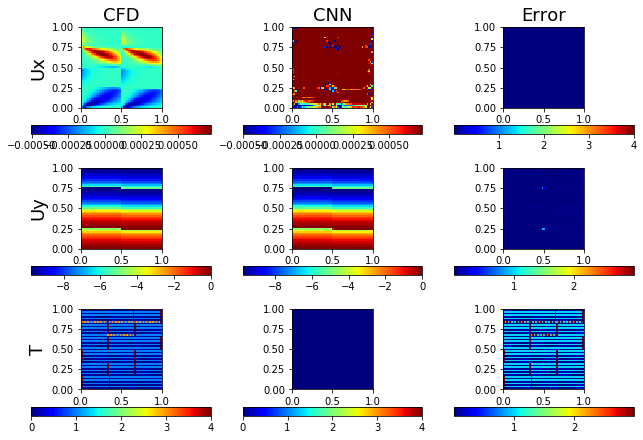

In [74]:
s=3
error = abs(pre_data_xy[:10] - val_preds[:10])

visualize_scale(pre_data_xy[:10], val_preds[:10], error[:10], s)

In [ ]:
def visualize_channel_check(sample_y, out_y,error, s, index1,index2,index3):
           
    minu = 0
    maxu = 1
    
    minv = 0
    maxv = 1
    
    minp = 0
    maxp = 1
    
    mineu = 0
    maxeu = 1
    
    minev = 0
    maxev = 0.2
    
    minep = 0
    maxep = 0.2
           
    plt.figure()
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.subplot(3, 3, 1)
    plt.title('CFD', fontsize=18)
    plt.imshow(np.transpose(sample_y[s, :, :, index1]), cmap='jet', vmin = minu, vmax = maxu, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.ylabel('Ux', fontsize=18)
    plt.subplot(3, 3, 2)
    plt.title('CNN', fontsize=18)
    plt.imshow(np.transpose(out_y[s, :, :, index1]), cmap='jet', vmin = minu, vmax = maxu, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.subplot(3, 3, 3)
    plt.title('Error', fontsize=18)
    plt.imshow(np.transpose(error[s, :, :, index1]), cmap='jet', vmin = mineu, vmax = maxeu, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')

    plt.subplot(3, 3, 4)
    plt.imshow(np.transpose(sample_y[s, :, :, index2]), cmap='jet', vmin = minv, vmax = maxv, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.ylabel('Uy', fontsize=18)
    plt.subplot(3, 3, 5)
    plt.imshow(np.transpose(out_y[s, :, :, index2]), cmap='jet', vmin = minv, vmax = maxv, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.subplot(3, 3, 6)
    plt.imshow(np.transpose(error[s, :, :, index2]), cmap='jet', vmin = minev, vmax = maxev, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')

    plt.subplot(3, 3, 7)
    plt.imshow(np.transpose(sample_y[s, :, :, index3]), cmap='jet', vmin = minp, vmax = maxp, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.ylabel('p', fontsize=18)
    plt.subplot(3, 3, 8)
    plt.imshow(np.transpose(out_y[s, :, :, index3]), cmap='jet', vmin = minp, vmax = maxp, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.subplot(3, 3, 9)
    plt.imshow(np.transpose(error[s, :, :, index3]), cmap='jet', vmin = minep, vmax = maxep, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.tight_layout()
    plt.show()

In [ ]:
s=55
error = abs(geometry_xy[:152] - geometry_xy[:152])

visualize_channel_check(geometry_xy[:152], geometry_xy[:152], error[:152], s, 3,4,5)

In [ ]:
# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()